# Elliott Hayton 

## Research question/interests

__How does the number of employees in small enterprises effect revenue, and annual growth rates in Europe?__


Using data on employment and revenue from both 2017 and 2020 I will explore the relationship between these two varibales. I want to do detirmine if the number of employees has a significant role on the company's sucess and ranking alongisde their revenue. 

Using data from companies with 10-250 employees in 2017 and 2020 I want to research the relationship between employment,  revenue, and growth rates. 50-250 employees captures what Europe calls small enterprises (10-50 employees). Small enterpises comprise the majority of this data. The analysis will have better applications by narrowing in on this range.   



In [ ]:
# loading dataframe
import pandas as pd
pd.read_csv("../data/raw/FT1000.csv")

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,peopleForecast,No,No,Germany,Technology,36.59,2086411,818658,45,15,2014
996,997,Digitalpa,No,No,Italy,Management Consulting,36.59,1731340,679440,12,41,2014
997,998,Faktenkontor,No,No,Germany,Advertising,36.59,30967000,12153143,150,100,2003
998,999,CLAREO,Yes,Yes,France,Retail,36.58,18854708,7399729,53,13,2012


## Milestone 3 
### Task 1: Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/raw/FT1000.csv")
df=df.drop(columns=['Ranked2021','Ranked2020','Country',])
df['Name'] = df['Name'].astype('str')
df['Sector'] = df['Sector'].astype('category')

df


,Rank,Name,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
0,1,Swappie,Technology,477.43,97611814,507000,218,1,2016
1,2,Kilo Health,Health,450.05,57318766,344428,177,10,2013
2,3,OCI,Financial Services,409.59,568322073,4325512,32,4,2012
3,4,OnlyFans,Technology,393.63,316732986,2652185,800,4,2016
4,5,Enpal,Energy,386.88,56109613,486165,365,9,2017
...,...,...,...,...,...,...,...,...,...
995,996,peopleForecast,Technology,36.59,2086411,818658,45,15,2014
996,997,Digitalpa,Management Consulting,36.59,1731340,679440,12,41,2014
997,998,Faktenkontor,Advertising,36.59,30967000,12153143,150,100,2003
998,999,CLAREO,Retail,36.58,18854708,7399729,53,13,2012


Text(0.5, 1.0, 'CAGR vs. Employment 2020')

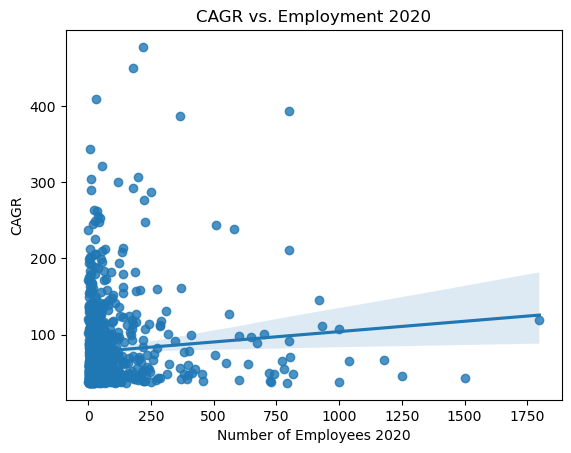

In [7]:
sns.regplot(x='Employees2020', y='CAGR', data=df)
plt.xlabel('Number of Employees 2020')
plt.ylabel('CAGR')
plt.title('CAGR vs. Employment 2020')


Text(0.5, 1.0, 'Hexbin: CAGR vs. Employment 2020')

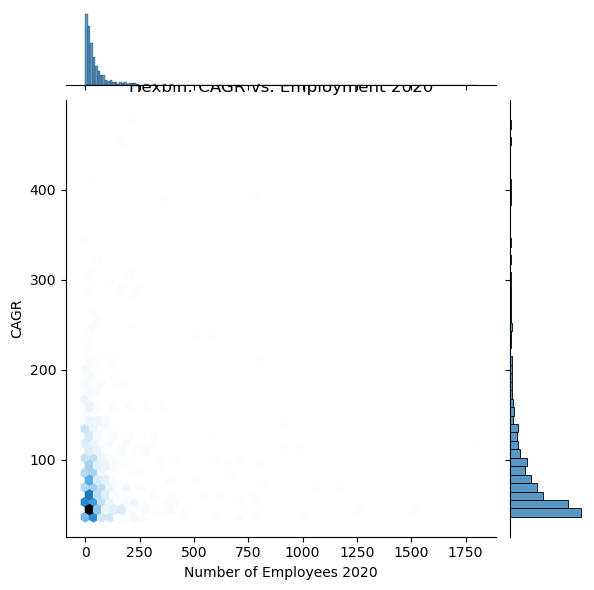

In [8]:
sns.jointplot(x='Employees2020', y='CAGR', data=df, kind='hex')
plt.xlabel('Number of Employees 2020')
plt.ylabel('CAGR')
plt.title('Hexbin: CAGR vs. Employment 2020')


CAGR vs. Employees graph seems overplotted. There is a slight postive slope on the trendline in the scatterplot but doesn't say much about the relationship betweeen company growth and employment size. More data analysis is required before I can draw conclusions from these plots. 

Text(0.5, 1.0, 'Employees vs. Revenue 2017')

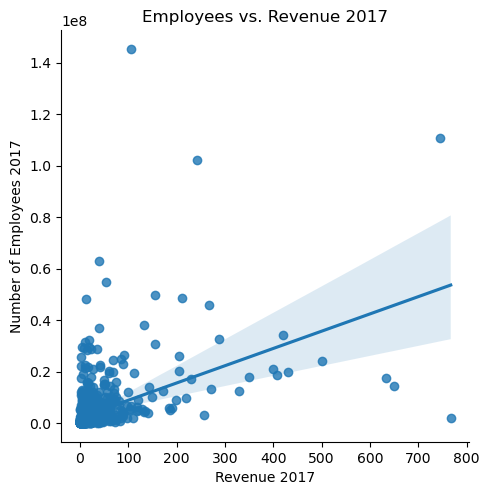

In [9]:
sns.lmplot(x='Employees2017',y='Revenue2017',data=df)
plt.xlabel('Revenue 2017')
plt.ylabel('Number of Employees 2017')
plt.title('Employees vs. Revenue 2017')

Scatterplot using 2017 data to show the realtionship between revenue and employment. Still dealing with overplotting but it seems to show a positive relationship between the two variables. This likely indicates that a larger workforce can accomplish more or bigger tasks which generates higher revenue. 

Text(0.5, 1.0, 'Employees vs. Revenue 2020')

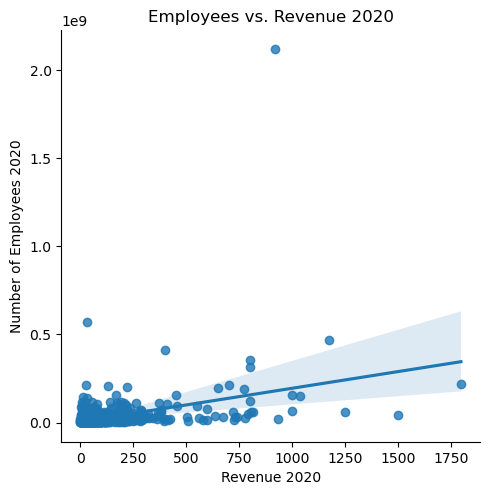

In [10]:
sns.lmplot(x='Employees2020',y='Revenue2020',data=df)
plt.xlabel('Revenue 2020')
plt.ylabel('Number of Employees 2020')
plt.title('Employees vs. Revenue 2020')

Scatterplot using 2020 data to show the realtionship between revenue and employment. Still dealing with overplotting but it seems to show a positive relationship between the two variables. This likely indicates that a larger workforce can accomplish more or bigger tasks which generates higher revenue. 

Text(0.5, 1.0, 'Firm size histogram')

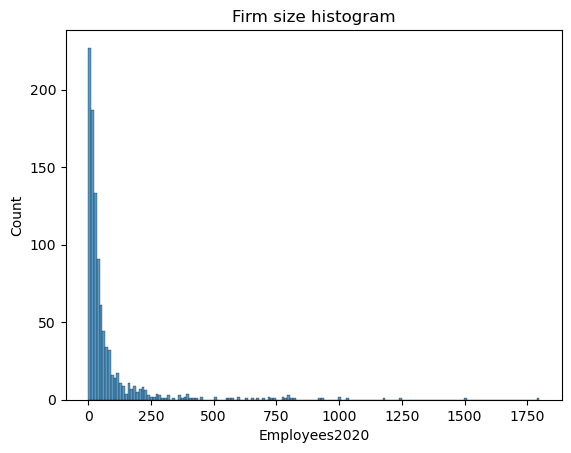

In [11]:
sns.histplot(data=df, x='Employees2020')
plt.title('Firm size histogram')

Histogram shows the number of firms given its size. Most firms are between 0-250 employees so furthering my analysis I might narrow into a specific range of employees to view the relationship between employment and revenue. 

## __PM4__

In [12]:
## add column 
df = (df.assign(**{'Change % in Employees': lambda x: ((x['Employees2017'] - x['Employees2020']) / x['Employees2017']) * 100}))
df

,Rank,Name,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Change % in Employees
0,1,Swappie,Technology,477.43,97611814,507000,218,1,2016,-21700.000000
1,2,Kilo Health,Health,450.05,57318766,344428,177,10,2013,-1670.000000
2,3,OCI,Financial Services,409.59,568322073,4325512,32,4,2012,-700.000000
3,4,OnlyFans,Technology,393.63,316732986,2652185,800,4,2016,-19900.000000
4,5,Enpal,Energy,386.88,56109613,486165,365,9,2017,-3955.555556
...,...,...,...,...,...,...,...,...,...,...
995,996,peopleForecast,Technology,36.59,2086411,818658,45,15,2014,-200.000000
996,997,Digitalpa,Management Consulting,36.59,1731340,679440,12,41,2014,70.731707
997,998,Faktenkontor,Advertising,36.59,30967000,12153143,150,100,2003,-50.000000
998,999,CLAREO,Retail,36.58,18854708,7399729,53,13,2012,-307.692308


In [ ]:
sector_df = (df.groupby("Sector").mean(numeric_only=True)
             .sort_values(by='CAGR', ascending=False)
             .round(2)
             .drop(columns=['Rank']))
sector_df

,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Change % in Employees
Sector,,,,,,,
Batteries,138.52,7.406541e+07,5581858.00,58.00,19.00,2014.00,-205.26
Fintech,111.46,3.214180e+07,5455762.50,169.50,47.00,2013.50,-289.79
Games industry,98.54,1.200823e+08,28099603.25,339.00,192.00,2009.00,-387.63
Personal & Household Goods,98.10,2.771231e+07,6868616.40,48.10,14.70,2011.90,-291.62
Food & Beverage,93.66,2.822042e+07,5566184.45,80.40,22.30,2010.15,-214.76
Financial Services,92.91,3.589247e+07,3931004.71,82.46,27.11,2013.25,-226.42
Waste management & recycling,91.44,1.008245e+07,1847225.83,34.92,11.50,2010.25,-231.86
Fashion,90.04,1.354491e+07,3449353.70,53.10,21.00,2012.10,-184.27
Property,89.89,2.607857e+07,4966304.12,27.38,9.38,2011.65,-201.85


In [ ]:
delimiters = [',', ';', '\t', '|']

for delimiter in delimiters:
    try:
        df = pd.read_csv(pd.compat.StringIO(df.to_csv(index=False)), delimiter=delimiter)
        print(f"Delimiter found: '{delimiter}'")
        break
    except:
        pass

### No delimiters found 

### Remove unused columns 


In [18]:
### METHOD CAHIN #1

df_new = (pd.read_csv("../data/raw/FT1000.csv")
      .drop(columns=['Ranked2021', 'Ranked2020'])
      .dropna()
      .query("Employees2017.between(10, 50) and Employees2020.between(10, 50)")
      .assign(**{'Change % in Employees': lambda x: ((x['Employees2020'] - x['Employees2017']) / x['Employees2020']) * 100}))
df_new

,Rank,Name,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Change % in Employees
37,38,Telemedi,Poland,Health,198.98,4452513,182100,50,10,2014,80.000000
41,42,LGM IMMOBILIER,France,Property,193.05,2549778,101311,11,10,2016,9.090909
84,85,Catraport,Portugal,Automobiles,141.39,7294549,518613,46,18,2015,60.869565
119,120,Treedom,Italy,Support Services,128.81,6709720,560150,42,18,2010,57.142857
136,137,Pinsami,Italy,Food & Beverage,120.71,4892000,455000,33,14,2015,57.575758
...,...,...,...,...,...,...,...,...,...,...,...
989,990,Wingeco,Italy,Industrial Goods,36.75,3407310,1332330,22,12,2016,45.454545
990,991,Meblobranie.pl,Poland,Ecommerce,36.71,19295429,6909799,25,12,2011,52.000000
994,995,Celeritas,Spain,Transport,36.61,58139933,22805398,27,10,2006,62.962963
995,996,peopleForecast,Germany,Technology,36.59,2086411,818658,45,15,2014,66.666667


In [32]:
df_new.to_csv('/Users/elliotthayton/Desktop/DATA301/project-group43/data/processed/Elliott_small.csv', index=False)


In [ ]:
sector_df = sector_df.sort_values(by='Revenue2020', ascending=False)
sector_df = sector_df.round(2)
sector_df = sector_df.drop(columns=['Rank'])
sector_df

,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Change % in Employees
Sector,,,,,,,
Games industry,98.54,1.200823e+08,28099603.25,339.00,192.00,2009.00,-387.63
Energy,84.31,8.358919e+07,10653945.17,109.10,36.00,2010.48,NaN
Batteries,138.52,7.406541e+07,5581858.00,58.00,19.00,2014.00,-205.26
Sales and Marketing,42.65,4.252509e+07,14649568.00,44.00,21.00,2008.00,-109.52
Financial Services,92.91,3.589247e+07,3931004.71,82.46,27.11,2013.25,-226.42
Travel & Leisure,65.23,3.440419e+07,9353581.43,167.43,46.71,2008.57,-308.47
Fintech,111.46,3.214180e+07,5455762.50,169.50,47.00,2013.50,-289.79
Ecommerce,79.27,2.997469e+07,6656552.00,63.77,23.75,2010.35,-258.82
Precious metals,46.38,2.866302e+07,8630283.00,20.00,16.50,1993.00,-104.84


In [ ]:
### METHOD CHAIN #2

sector_df = (df.groupby("Sector").mean(numeric_only=True)
             .sort_values(by='Revenue2020', ascending=False)
             .round(2)
             .drop(columns=['Rank']))
sector_df

,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Change % in Employees
Sector,,,,,,,
Games industry,118.89,1.595925e+08,37267169.00,451.67,255.67,2006.67,-516.84
Energy,82.10,8.530327e+07,10898186.37,111.71,36.88,2010.39,-319.20
Batteries,138.52,7.406541e+07,5581858.00,58.00,19.00,2014.00,-205.26
Sales and Marketing,42.65,4.252509e+07,14649568.00,44.00,21.00,2008.00,-109.52
Financial Services,94.82,3.711485e+07,4038719.19,85.44,28.07,2013.26,-231.10
Travel & Leisure,65.23,3.440419e+07,9353581.43,167.43,46.71,2008.57,-308.47
Fintech,111.46,3.214180e+07,5455762.50,169.50,47.00,2013.50,-289.79
Ecommerce,79.51,3.033391e+07,6735659.58,64.73,24.11,2010.36,-261.30
Food & Beverage,96.21,2.953256e+07,5802714.32,84.53,23.32,2009.95,-227.82


In [20]:
### WRAP IN A FILE 

def load_and_process(url):
    df_new = (pd.read_csv("../data/raw/FT1000.csv")
      .drop(columns=['Ranked2021', 'Ranked2020'])
      .dropna()
      .query("Employees2017.between(10, 250) and Employees2020.between(10, 250)")
      .assign(**{'Change % in Employees': lambda x: ((x['Employees2020'] - x['Employees2017']) / x['Employees2020']) * 100}))

    sector_df = (df.groupby("Sector").mean()
                 .sort_values(by='Revenue2020', ascending=False)
                 .round(2)
                 .drop(columns=['Rank']))

    return df_new

Text(0.5, 1.0, 'Hexbin: CAGR vs. Employment 2020')

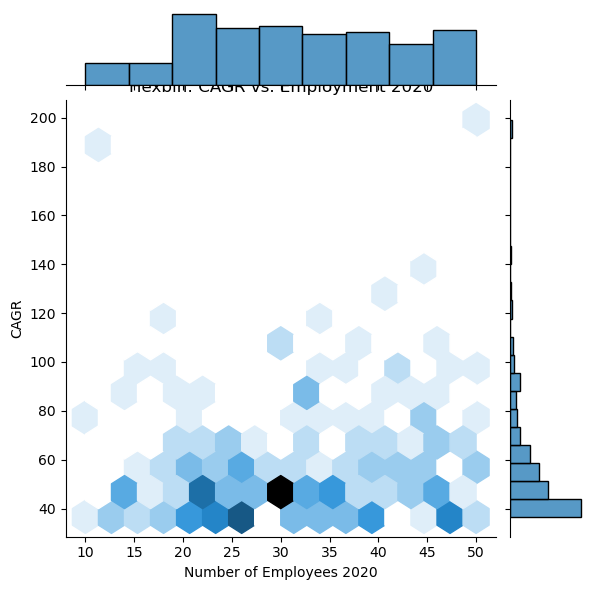

In [19]:
sns.jointplot(x='Employees2020', y='CAGR', data=df_new, kind='hex')
plt.xlabel('Number of Employees 2020')
plt.ylabel('CAGR')
plt.title('Hexbin: CAGR vs. Employment 2020')

The grphs shows that most small buisnesses in 2020 had around 30 employees with a compound annual growth rate of around 50%. This seems quite significant.There seems to be a "sweet spot" for the numer of employees in a small buisness to grow fastest. 

Text(0.5, 1.0, 'Revenue vs. Employment 2020')

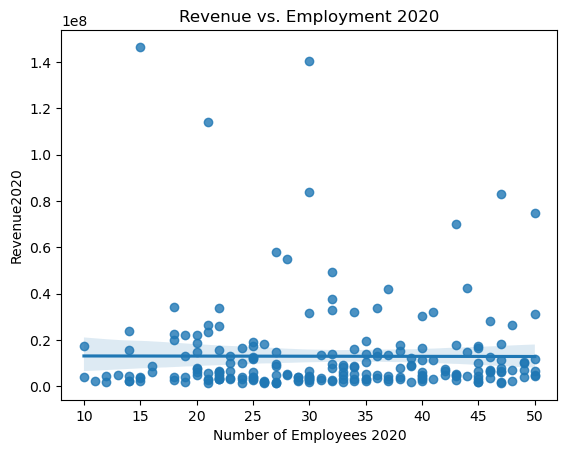

In [31]:
sns.regplot(x='Employees2020', y='Revenue2020', data=df_new)
plt.xlabel('Number of Employees 2020')
plt.ylabel('Revenue2020')
plt.title('Revenue vs. Employment 2020')



Text(0.5, 1.0, 'Revenue vs. Employment 2017')

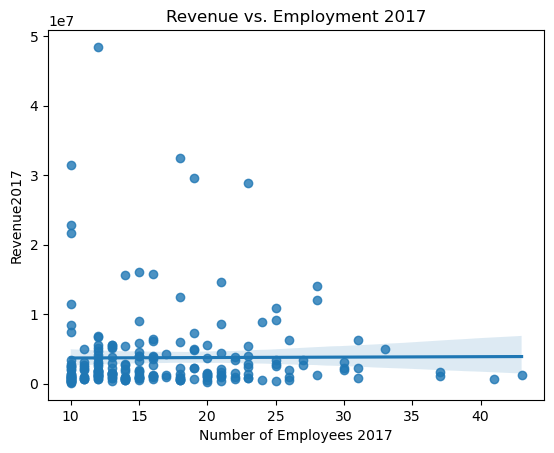

In [30]:
sns.regplot(x='Employees2017', y='Revenue2017', data=df_new)
plt.xlabel('Number of Employees 2017')
plt.ylabel('Revenue2017')
plt.title('Revenue vs. Employment 2017')

There appears to be no correlation between revenue and employment for both 2017 and 2020. 

Text(0.5, 1.0, 'Firm size histogram')

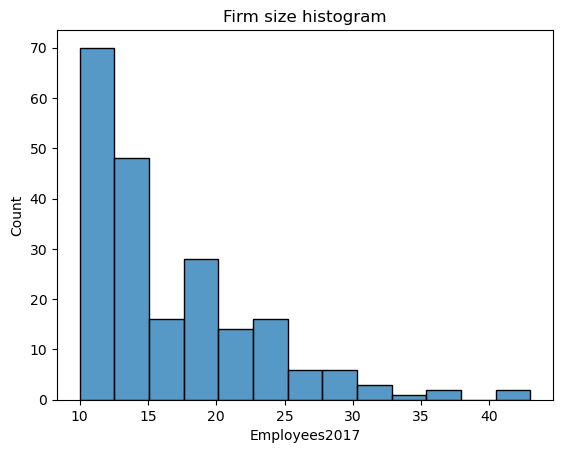

In [22]:
sns.histplot(data=df_new, x='Employees2017')
plt.title('Firm size histogram')

Text(0.5, 1.0, 'Firm size histogram')

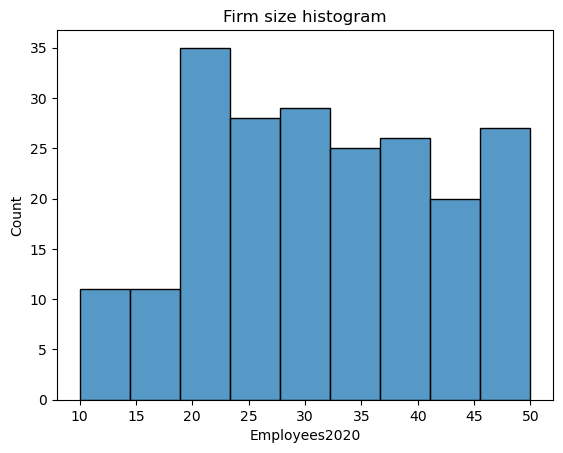

In [21]:
sns.histplot(data=df_new, x='Employees2020')
plt.title('Firm size histogram')

2017 had many more buisnesses with fewer than 15 employees, compared to 2020 where 0-15 comprises the minority. The peak is 20-25 employees, similar to the hexbin plot above. 

Text(0.5, 1.0, 'Hexbin: Revenue & Employment')

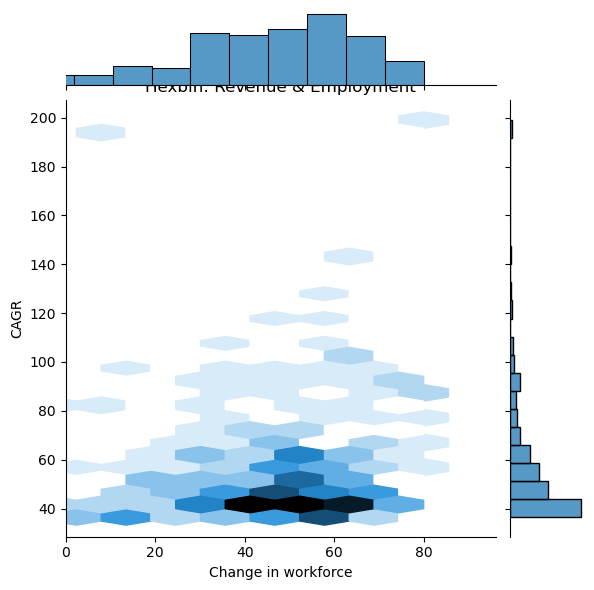

In [28]:
sns.jointplot(x='Change % in Employees', y='CAGR', data=df_new, kind='hex')
plt.xlim(0)
plt.xlabel('Change in workforce')
plt.ylabel('CAGR')
plt.title('Hexbin: Revenue & Employment')

It appears that most small enterpises increased by 40-60% from 2017 to 2020, this could explain the differences in the histograms above. 

Firms that grew less than 25% don;t surpass annual growth rates higher than 70%. Most of the data for very high annual growth rates lied in the 40-70% change in workforce range. 

In [ ]:
from code import project_functions2

df = project_functions2.load_and_process()


SyntaxError: invalid syntax (project_functions2.py, line 3)

In [23]:
from code import project_functions2 # This is called a relative import
df = project_functions2.load_and_process("../data/raw/FT1000.csv")
df

ImportError: cannot import name 'project_functions2' from 'code' (/Users/elliotthayton/miniconda3/lib/python3.10/code.py)

__Conclusion__

After doing research I have drawn several conclusions. I began by finding that revenue and employment are postivetly correlated but the question is redundant so I narrowed my search to analyze small buisnesses to do more insightful research. I didn't find a positive relationship between employment and revenue but a more non linear distribution. The data showed rnages in employment that lead to the largest growth rates among the fastest growing small buisnesses. Firms with 20-40 employees gorwing 12-20% annually had the highest likelihood of having annual gorwth rates higher than 100%.  